In [75]:
import os, shutil

In [76]:
original_dataset_dir = f'/home/toliman/PycharmProjects/PythonProgramming/deeplearning/kaggle_original_data/train'
base_dir = f'/home/toliman/PycharmProjects/PythonProgramming/deeplearning/cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [77]:
try:
    os.mkdir(base_dir)
except FileExistsError:
    pass
try:
    os.mkdir(train_dir)
except FileExistsError:
    pass
try:
    os.mkdir(validation_dir)
except FileExistsError:
    pass
try:
    os.mkdir(test_dir)
except FileExistsError:
    pass

In [78]:
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

try:
    os.mkdir(train_cats_dir)
    os.mkdir(train_dogs_dir)
except FileExistsError:
    pass

In [79]:
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

try:
    os.mkdir(validation_cats_dir)
    os.mkdir(validation_dogs_dir)
except FileExistsError:
    pass

In [80]:
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

try:
    os.mkdir(test_cats_dir)
    os.mkdir(test_dogs_dir)
except FileExistsError:
    pass

In [81]:
fnames = [f'cat.{i}.jpg' for i in range(1000, )]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = [f'cat.{i}.jpg' for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = [f'cat.{i}.jpg' for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = [f'dog.{i}.jpg' for i in range(1000, )]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = [f'dog.{i}.jpg' for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = [f'dog.{i}.jpg' for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [82]:
from tensorflow.keras import layers, models

network = models.Sequential(
    [
        layers.Conv2D(32, (3, 3,), activation='relu', input_shape=(150, 150, 3,)),
        layers.MaxPooling2D((2, 2,)),
        layers.Conv2D(64, (3, 3,), activation='relu'),
        layers.MaxPooling2D((2, 2,)),
        layers.Conv2D(128, (3, 3,), activation='relu'),
        layers.MaxPooling2D((2, 2,)),
        layers.Conv2D(128, (3, 3,), activation='relu'),
        layers.MaxPooling2D((2, 2,)),
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(1, activation='sigmoid'),
    ]
)

network.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

In [83]:
from tensorflow.keras import optimizers

network.compile(loss='binary_crossentropy',
                optimizer=optimizers.RMSprop(lr=1e-4),
                metrics=['acc'])

/home/toliman/.local/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [84]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1. / 255)
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150,),
    batch_size=20,
    class_mode='binary',
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150,),
    batch_size=20,
    class_mode='binary',
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150,),
    batch_size=20,
    class_mode='binary',
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [85]:
history = network.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=1,
    validation_data=validation_generator,
    validation_steps=50,
)

network.save('cats_vs_dogs_v1.h5')

/home/toliman/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


100/100 [==============================] - 26s 259ms/step - loss: 0.6819 - acc: 0.5555 - val_loss: 0.6521 - val_acc: 0.6430

In [86]:
from tensorflow.keras import models

network = models.load_model('cats_vs_dogs_v1.h5')

In [87]:
network.evaluate(test_generator)

50/50 [==============================] - 3s 49ms/step - loss: 0.6587 - acc: 0.6050

[0.6587337255477905, 0.6050000190734863]

In [88]:
history.history

{'loss': [0.6819095015525818],
 'acc': [0.5554999709129333],
 'val_loss': [0.6521485447883606],
 'val_acc': [0.6430000066757202]}

In [89]:
h = history.history
acc = h['acc']
val_acc = h['val_acc']
los = h['loss']
val_loss = h['val_loss']

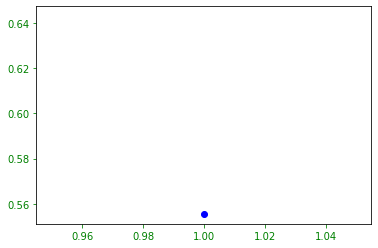

In [90]:
from matplotlib import pyplot as plt

epochs = list(range(1, len(acc) + 1))
plt.plot(epochs, acc, 'bo')
plt.plot(epochs, val_acc, 'b')
plt.tick_params(axis='x', colors='green')
plt.tick_params(axis='y', colors='green')
plt.show()

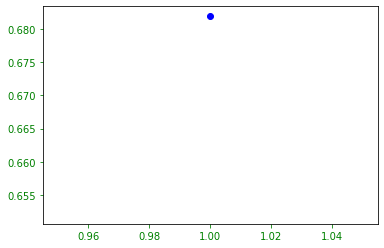

In [91]:
plt.clf()
import numpy as np

plt.plot(epochs, los, 'bo')
plt.plot(epochs, val_loss, 'b')
plt.tick_params(axis='x', colors='green')
plt.tick_params(axis='y', colors='green')
plt.show()

In [92]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=.2,
    height_shift_range=.2,
    shear_range=.2,
    zoom_range=.25,
    horizontal_flip=True,
    fill_mode='nearest',
)

In [93]:
plt.clf()
from tensorflow.keras.preprocessing import image

# fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
# # img_path = fnames[3]
# #
# # img = image.load_img(img_path, target_size=(150, 150,))
# # x = image.img_to_array(img)
#
# for x in test_generator:
#     break
#
# # print(x)
# # plt.imshow(x)
# # x = x.reshape((1,) + x.shape)
# i = 0
# for batch in datagen.flow(x, batch_size=1):
#     print(batch[0].shape)
#     plt.figure(i)
#     imgplot = plt.imshow(image.img_to_array(batch[0][0]))
#     i += 1
#     if i == 6:
#         break
#
# plt.show()

<Figure size 432x288 with 0 Axes>

In [95]:
from tensorflow.keras import optimizers

network = models.Sequential(
    [
        layers.Conv2D(32, (3, 3,), activation='relu', input_shape=(150, 150, 3,), ),
        layers.MaxPool2D((2, 2,), ),
        layers.Conv2D(64, (3, 3,), activation='relu', ),
        layers.MaxPool2D((2, 2,), ),
        layers.Conv2D(128, (3, 3,), activation='relu', ),
        layers.MaxPool2D((2, 2,), ),
        layers.Conv2D(128, (3, 3,), activation='relu', ),
        layers.MaxPool2D((2, 2,), ),
        layers.Flatten(),
        layers.Dropout(.5),
        layers.Dense(512, activation='relu', ),
        layers.Dense(1, activation='sigmoid', ),
    ]
)

network.compile(loss='binary_crossentropy',
                optimizer=optimizers.RMSprop(learning_rate=1e-4),
                metrics=['acc'], )

In [96]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=.2,
    height_shift_range=.2,
    shear_range=.2,
    zoom_range=.2,
    horizontal_flip=True,
)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150,),
    batch_size=32,
    class_mode='binary',
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150,),
    batch_size=32,
    class_mode='binary',
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [98]:
history = network.fit_generator(
    train_generator,
    steps_per_epoch=2000 // 32,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=1000 // 32,
)

network.save('cats_vs_dogs_v2.h5')



/home/toliman/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
62/62 [==============================] - 26s 423ms/step - loss: 0.6864 - acc: 0.5427 - val_loss: 0.6706 - val_acc: 0.5756